# [BAT512] Advanced Data Mining with AI <br/><br/> 개인과제 1

*구글 드라이브 연결과 라이브러리 임포트는 실습자료 참고하여 본인 경로에 맞게 설정하여 사용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q1) 의료 보험비 데이터(medical_cost.csv)를 로드하여 data라는 이름의 pandas dataframe에 저장하시오
- 수업 구글 드라이브(https://drive.google.com/drive/folders/1_XgKnBsZRG8Pbo73DXARm1HsplRgWrvo?usp=drive_link)의 [Assignment]-[data] 폴더에 있는 데이터를 본인 구글 드라이브로 복사하여 사용
- 의료 보험비 데이터는 개인 특성에 따른 의료보험 비용을 나타낸 데이터
    - 종속(Target)변수: "charges" - 의료보험 비용을 나타낸 연속형 데이터
- Pandas 라이브러리 활용

In [2]:
data = pd.read_csv("data/medical_cost.csv")

## Q2) 데이터 형태와 결측치, 분포를 확인하여 출력하시오
- Pandas 라이브러리 활용

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Q3) 나이("age")가 40세 이상이며 흡연여부("smoker")가 yes인 사람들의 데이터 샘플을 조건문을 통해 선택하여 출력하시오
- Matplotlib 라이브러리 활용

In [6]:
data[(data["age"]>=40) & (data["smoker"]=="yes")]

,age,sex,bmi,children,smoker,region,charges
11,62,female,26.290,0,yes,southeast,27808.72510
39,60,male,39.900,0,yes,southwest,48173.36100
52,48,male,28.000,1,yes,southwest,23568.27200
55,58,male,36.955,2,yes,northwest,47496.49445
58,53,female,22.880,1,yes,southeast,23244.79020
...,...,...,...,...,...,...,...
1303,43,male,27.800,0,yes,southwest,37829.72420
1304,42,male,24.605,2,yes,northeast,21259.37795
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


## Q4) 수치형 변수들 간의 상관관계를 히트맵을 통해 시각화하여 출력하시오

In [7]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


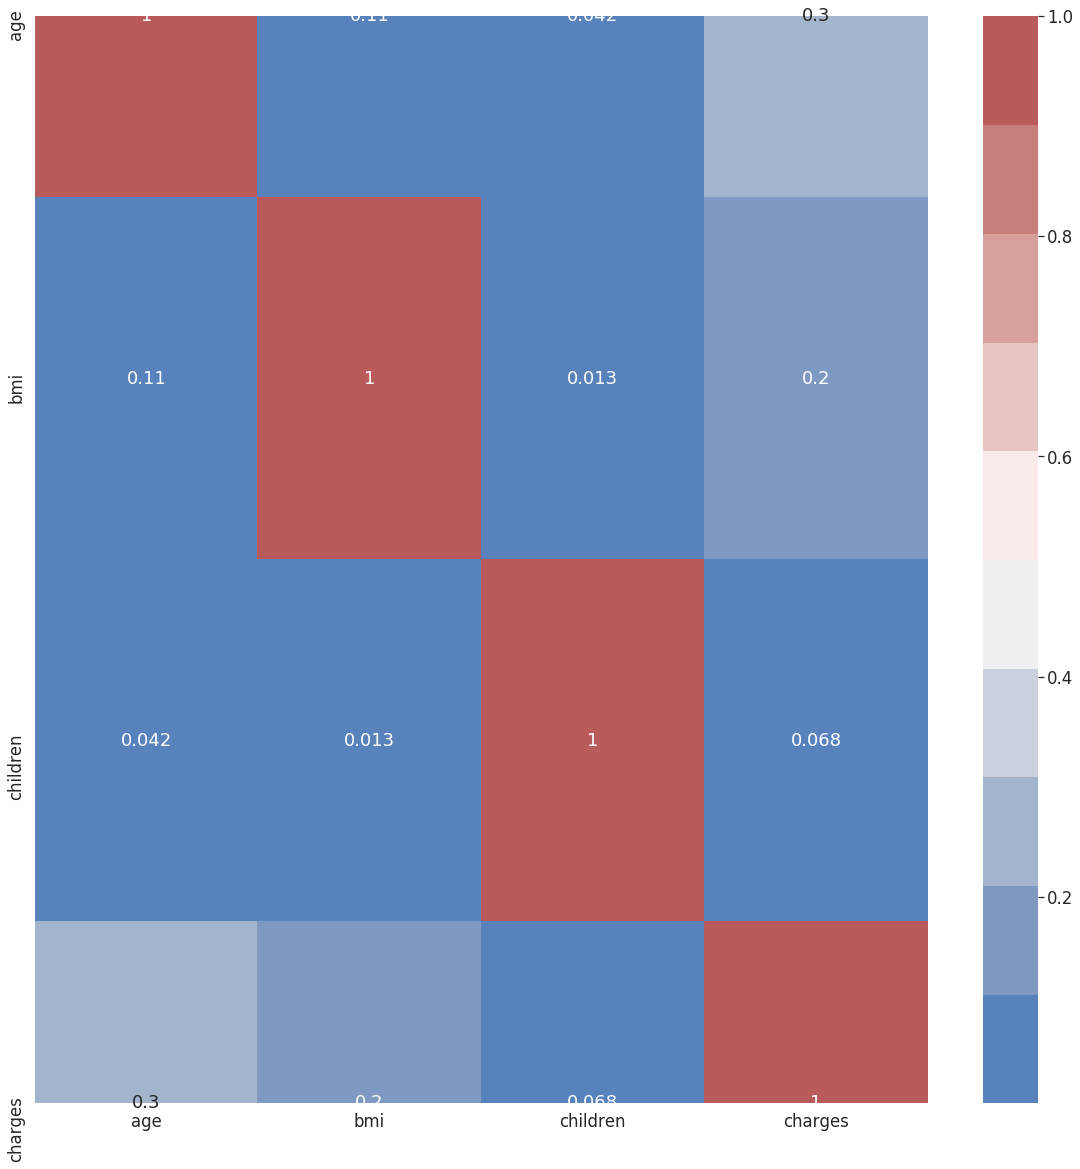

In [8]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette("vlag", 10))
plt.show()

## Q5) 각 범주형 변수별 샘플 수를 출력하시오
- Pandas 라이브러리 활용

In [9]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
data["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

## Q6) 각 범주형 변수를 레이블 인코딩을 통해 수치형 데이터로 변환하고, data를 변환된 변수로 업데이트하시오
- sklearn 라이브러리 활용

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [13]:
data["sex"] = label_encoder.fit_transform(data["sex"])
data["smoker"] = label_encoder.fit_transform(data["smoker"])
data["region"] = label_encoder.fit_transform(data["region"])

In [14]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Q7) 데이터를 독립변수(X)와 종속변수(y)로 나누시오

In [15]:
independent_variables = ["age", "sex", "bmi", "children", "smoker", "region"]
dependent_variable = ["charges"]

In [16]:
X = data[independent_variables]
y = data[dependent_variable]

In [17]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [18]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


## Q8) 변환된 데이터에 대해 선형 회귀 모델을 학습시키고, 회귀 모델의 회귀 계수(가중치 및 편향)와 적합도(r2_score)를 출력하시오
- sklearn 라이브러리 활용

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
print("가중치:", np.round(model.coef_, 2))
print("편향:", np.round(model.intercept_,2))

가중치: [[  257.29  -131.11   332.57   479.37 23820.43  -353.64]]
편향: [-11815.45]


In [22]:
model.score(X, y)

0.7507372027994937